# Predicting Housing Prices using Linear Regression
Two datasets were used in this project
1. USA Housing Dataset
2. Boston Housing Dataset

This EDA is includes
1. Loading the dataset
2. Inspecting dataset using .info() to check missing entries and .describe() to check count, mean, std, min, max, 25%, 50% and 75% of the dataset
3. Distribution and pairplots of features
4. Correlation of each features represented in a heatmap
5. Linear Regression model
6. How good is the model?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Part 1: USA Housing Dataset
## 1. Let's load the USA Housing Dataset

In [2]:
df=pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


## 2A. Let's inspect missing data using .info()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


## 2B. Let's look at a quick statistcal information about the dataset using .describe()

In [4]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [5]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

## 3. Distribution and Pairplots of the USA Housing dataset

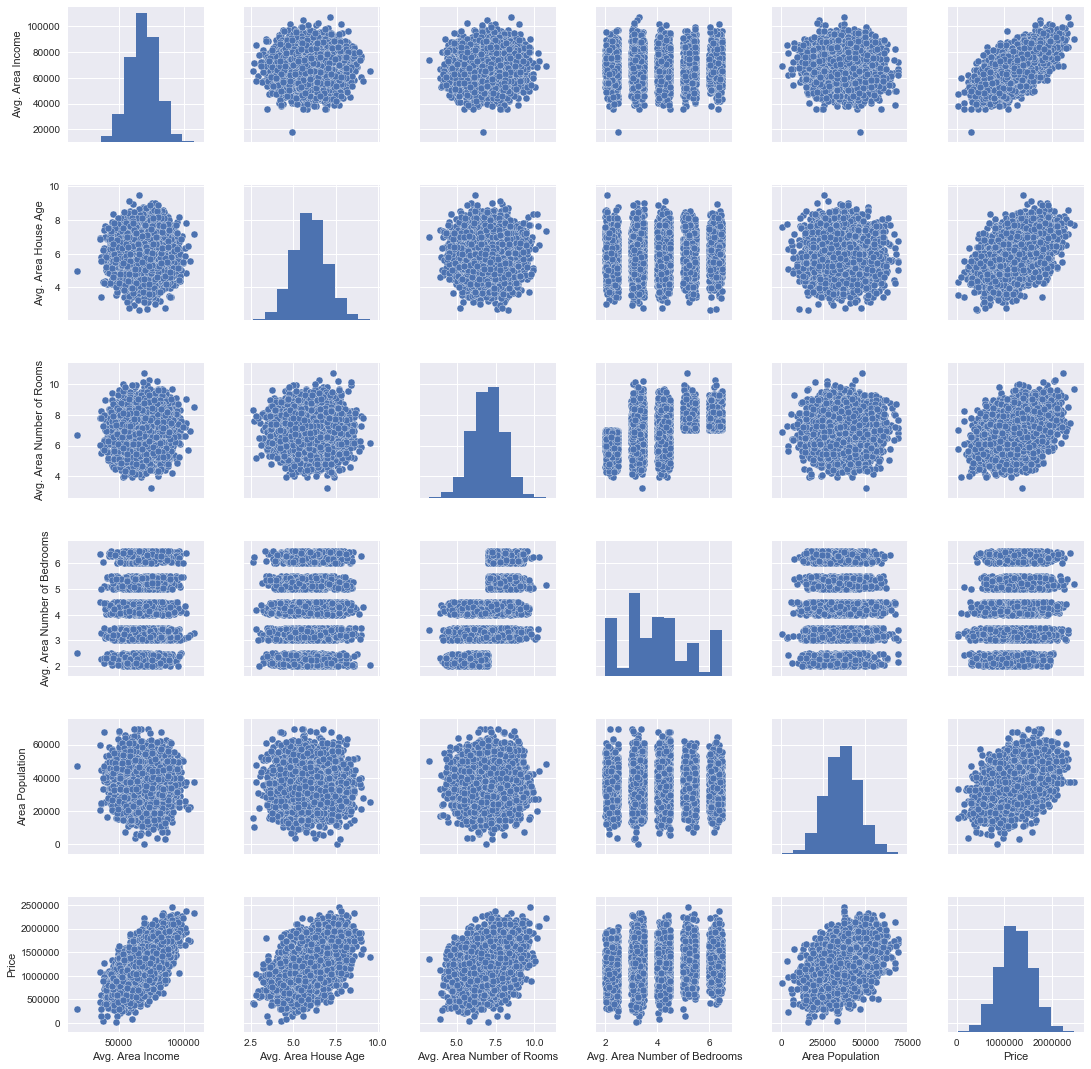

In [6]:
sns.pairplot(df)

### Price and all features except for Average Area Number of Bedrooms has a normal distribution

In [7]:
sns.set(style="whitegrid", color_codes=True)
sns.set_context("poster")

### Let's enlarge the distribution of Price in the plot above.  Price has a Normal Distrubution

C:\Users\pamel\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


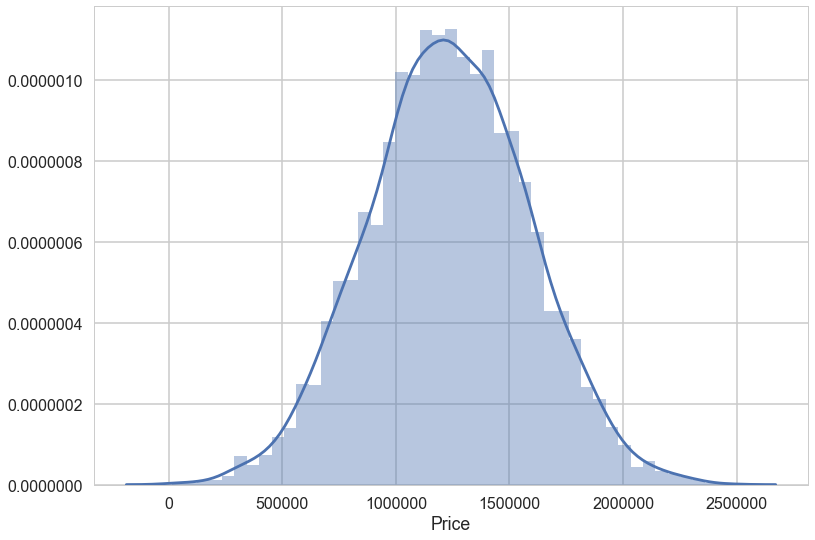

In [8]:

sns.distplot(df['Price'])

## 4. Correlation of features with heatmap

In [9]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


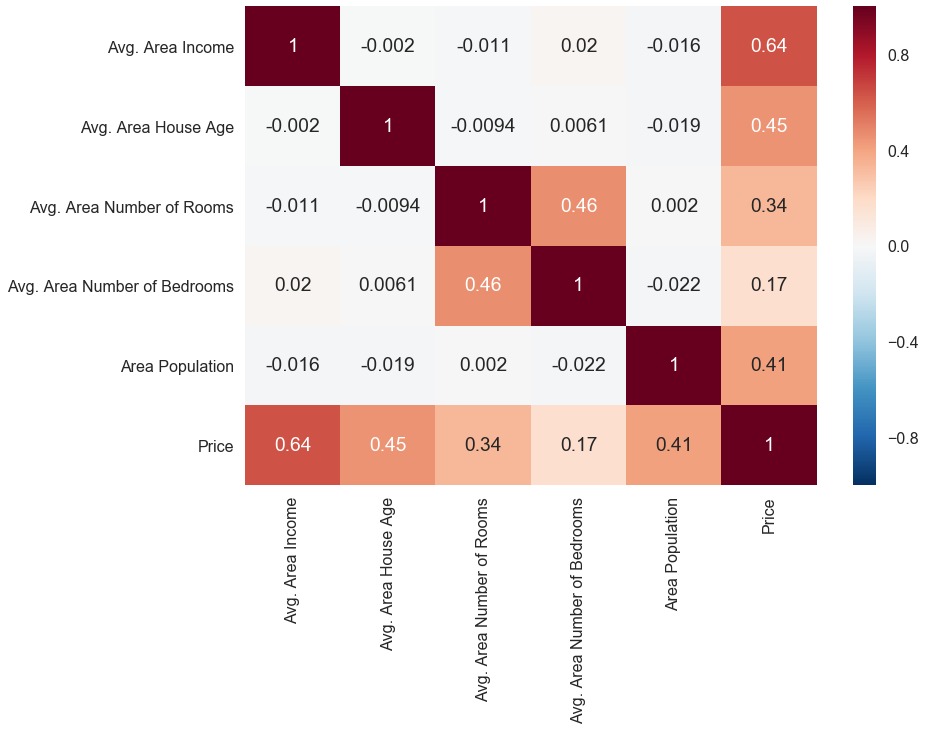

In [10]:
sns.heatmap(df.corr(), annot=True)

In [11]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

## Let's define our features (X) and target (y)

In [12]:
X=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']]

In [13]:
y=df['Price']

In [14]:
from sklearn.cross_validation import train_test_split

C:\Users\pamel\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Let's split it into train and test sets

In [15]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.4, random_state=101)

## 5. Linear Regression Model Creation for USA Housing Dataset

In [16]:
from sklearn.linear_model import LinearRegression


In [17]:
lm=LinearRegression()

In [18]:
#Let us fit the training set
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
# y_intercept
print(lm.intercept_)

-2640159.79685


In [20]:
lm.coef_

array([  2.15282755e+01,   1.64883282e+05,   1.22368678e+05,
         2.23380186e+03,   1.51504200e+01])

In [21]:
X_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [22]:
cdf=pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

In [23]:
# Coefficients of the model. Each coefficient means if you hold other features fixed, 
## 1 unit increase in that feature will have average change in price equal to the coefficient
cdf

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


## 6. How good is the model? Let's use R squared which measures how well the data fits the model created.

In [24]:
# R squared of training set
lm.score(X_train, y_train)

0.91812232005684113

In [25]:
# R squared of test set
lm.score(X_test, y_test)

0.91768240096492004

## Prediction using the created model for USA Housing Dataset

In [26]:
y_USA_predict=lm.predict(X_test)

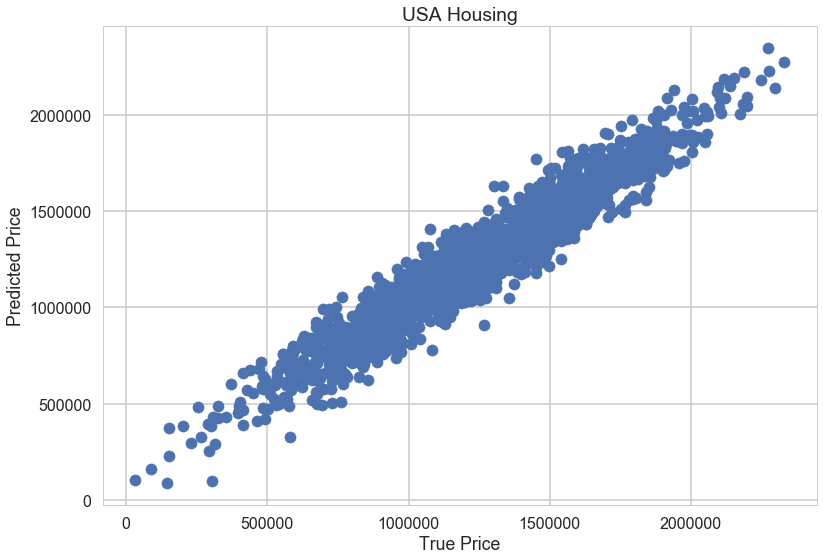

In [27]:
plt.scatter(y_test, y_USA_predict)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('USA Housing')

C:\Users\pamel\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


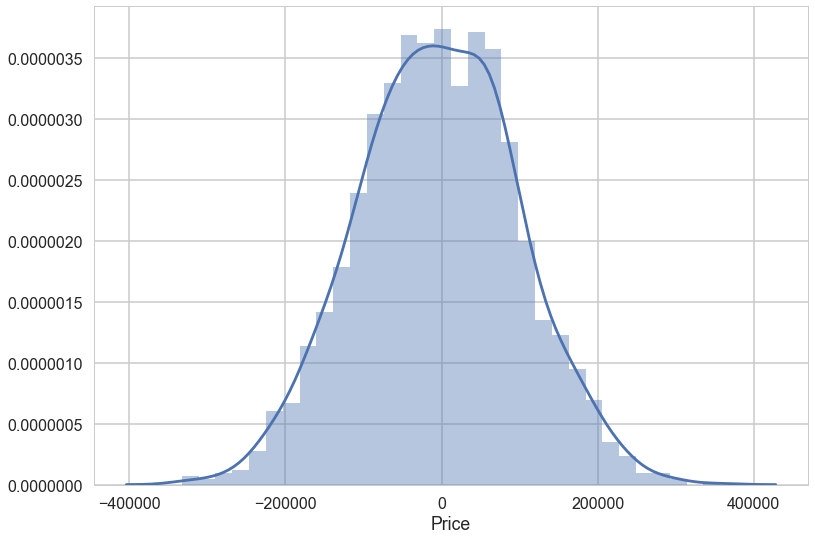

In [28]:
sns.distplot((y_test- y_USA_predict))

- y_test vs y_predicted plot above shows our residuals and has a linear relationship.
- difference of y_test and y_USA_predict is normal distribution which means our linear regression is a pretty good model for this problem

In [29]:
from sklearn import metrics

In [30]:
#Mean Absolute Error using y_test (MAE)
metrics.mean_absolute_error(y_test, y_USA_predict)

82288.222519149567

In [31]:
#Mean Squared Error using y_test (MSE)
metrics.mean_squared_error(y_test, y_USA_predict)

10460958907.209501

In [32]:
## Root mean squared error (RMSE)
np.sqrt(metrics.mean_squared_error(y_test, y_USA_predict))

102278.82922291153

# Part 2. Now let's redo the same analysis using the Boston Housing Dataset
## 1. Let's load the Boston Housing Dataset

In [33]:
from sklearn.datasets import load_boston

In [34]:
boston=load_boston()

In [35]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [36]:
print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [37]:
#This are the features available
print(boston['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [38]:
#Let's create the dataframe with all features
df_boston=pd.DataFrame(boston.data, columns=['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT'])
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [39]:
#Let's add our target and name it "Price" in the dataframe
df_boston['Price']=boston.target

In [40]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 2A. Let's inspect missing data using .info()

In [41]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


## 2B. Let's look at a quick statistcal information about the dataset using .describe()

In [42]:

df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 3. Distribution and Pairplots of the Boston Housing dataset

In [43]:
# Let's calculate pearson correlation coefficient for each column
df_boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


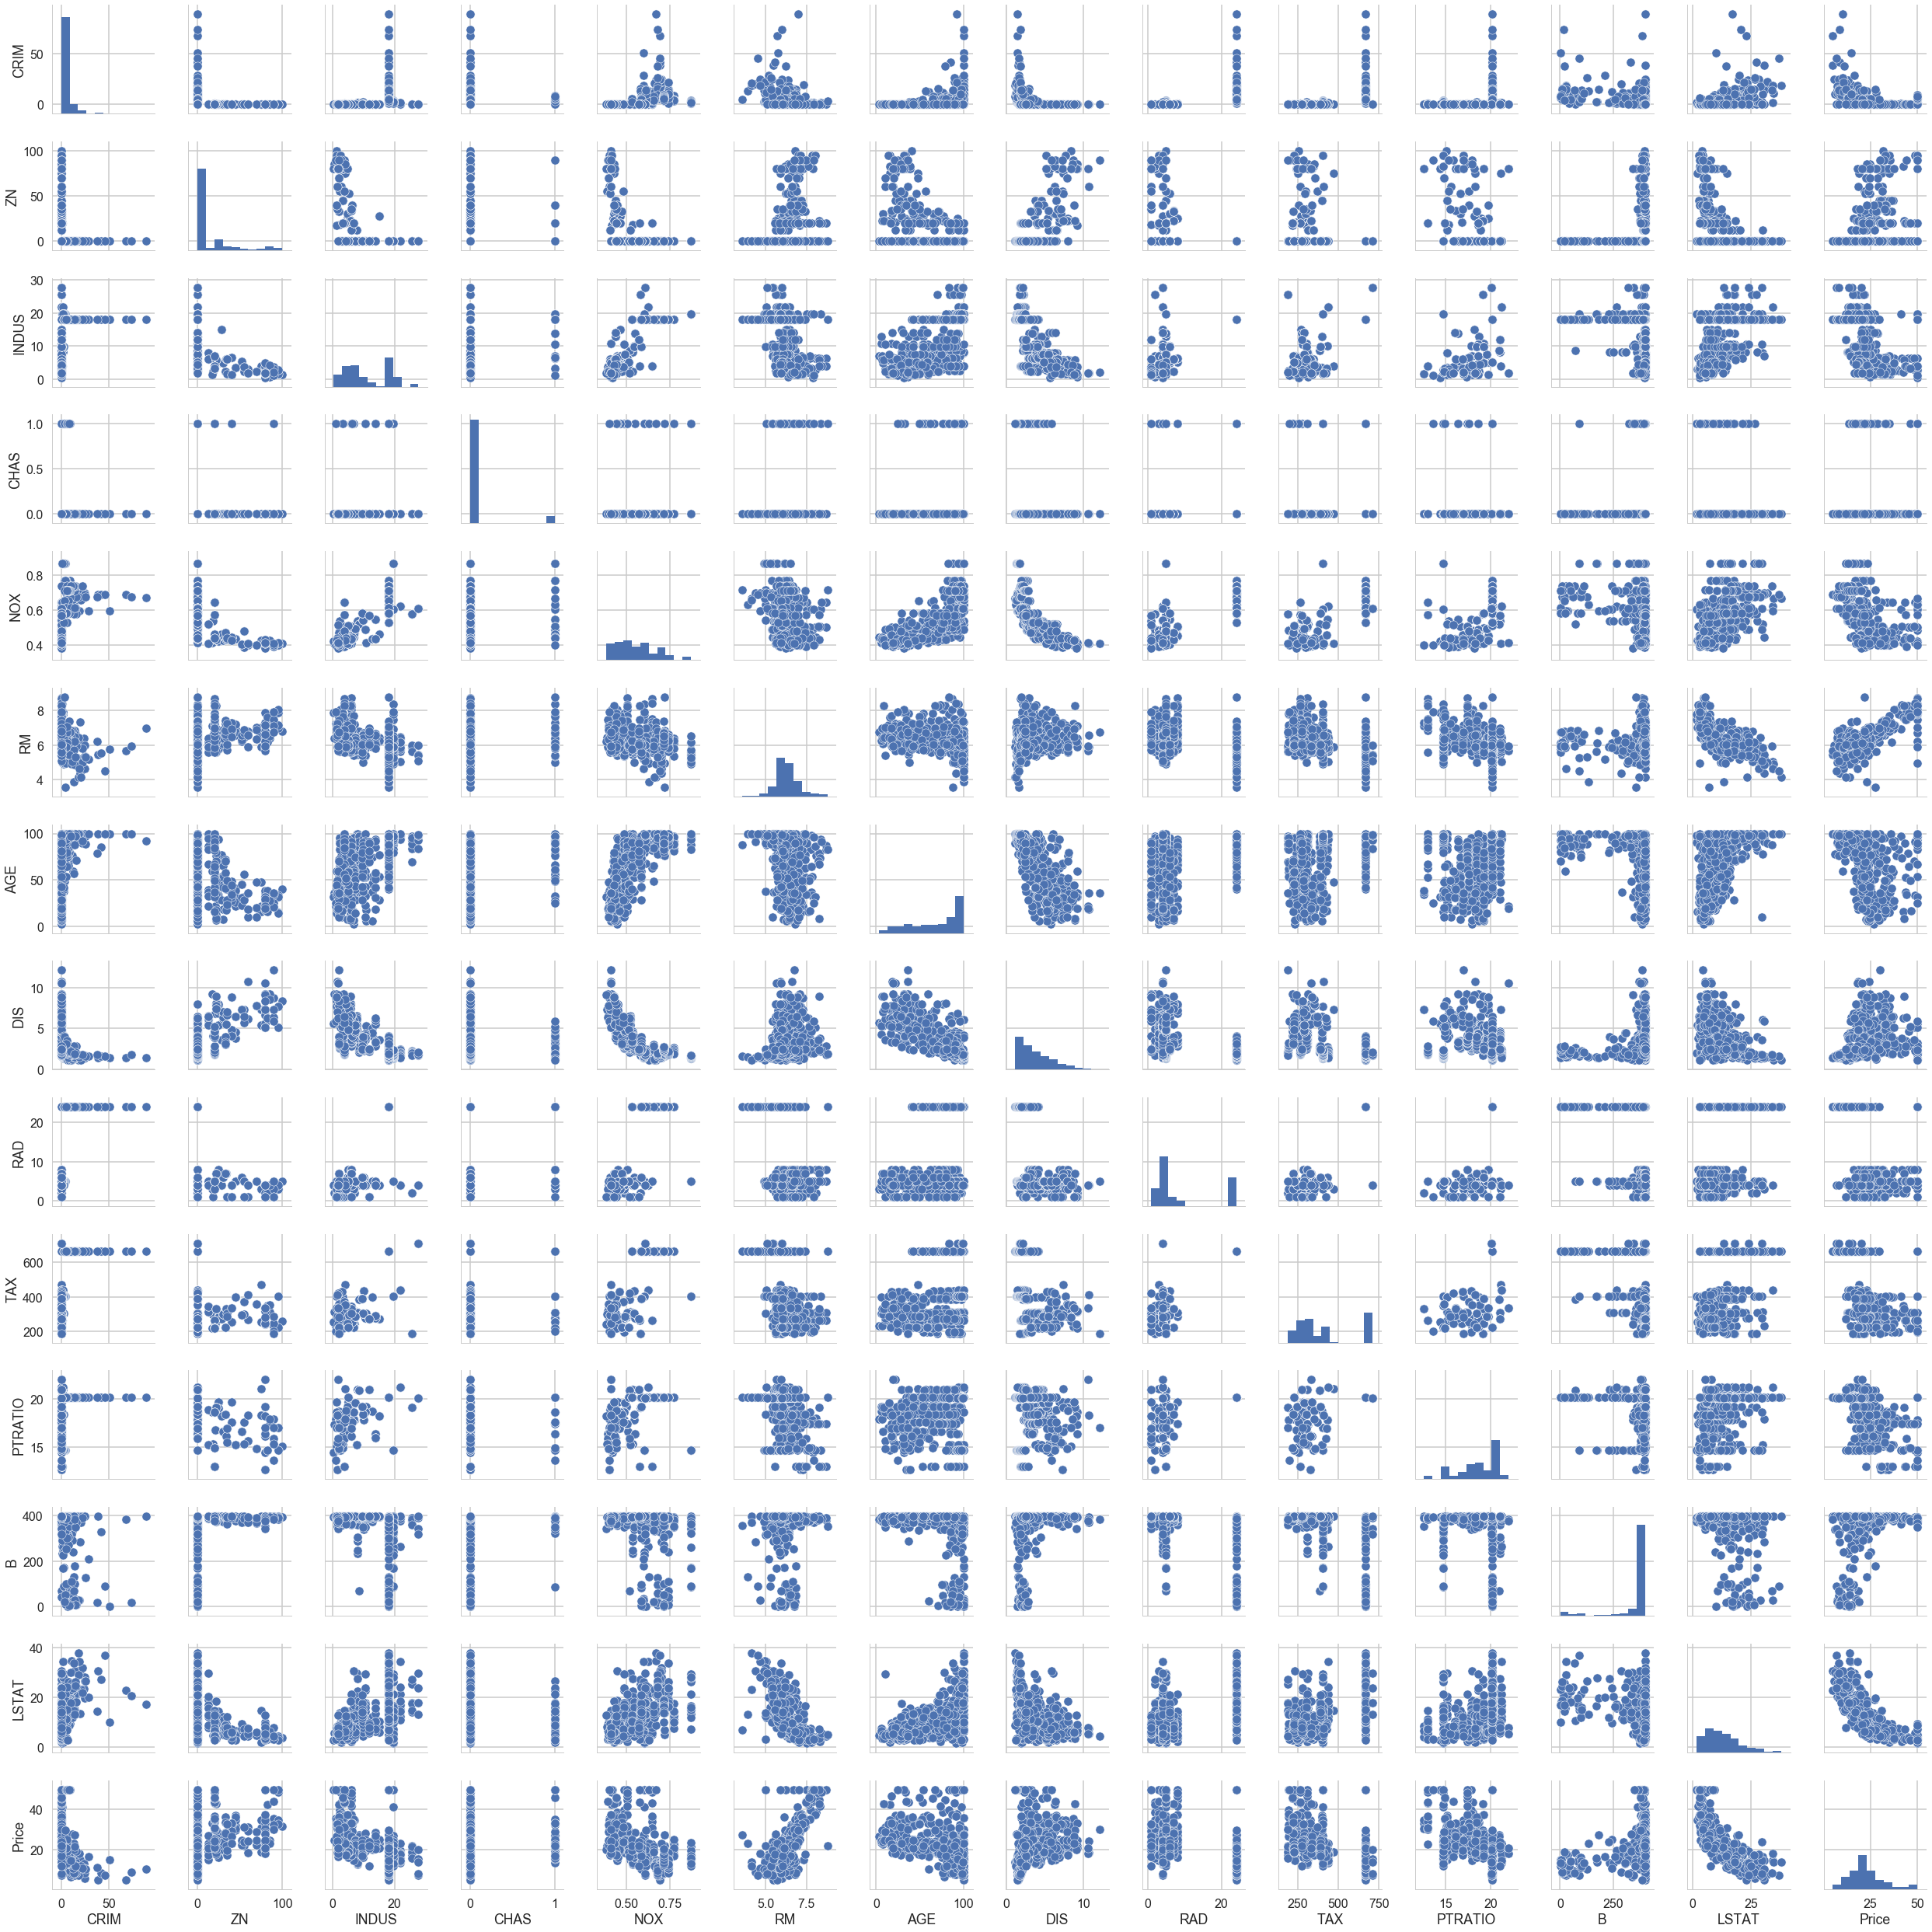

In [44]:
#Let's visualize this correlation
sns.pairplot(df_boston)

## Only RM and Price has a normal distribution look
## LSTAT, RAD, DIS, ZN, NOX and CRIM are positively skewed
## B,PTRATIO and AGE are negatively skewed
## CHAS, TAX and RAD has bimodal distribution

C:\Users\pamel\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


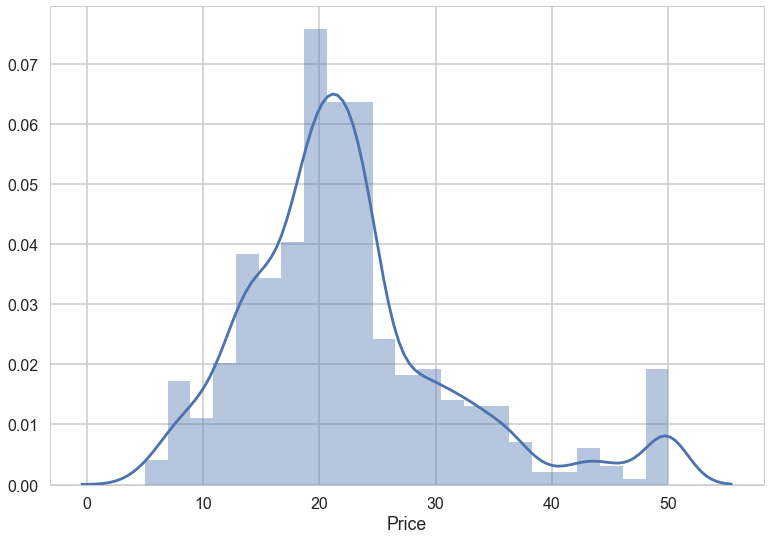

In [45]:
#Let's enlarget distribution plot for Price
sns.distplot(df_boston.Price)

## Price is actually a little positively skewed

## 4. Correlation of features with heatmap

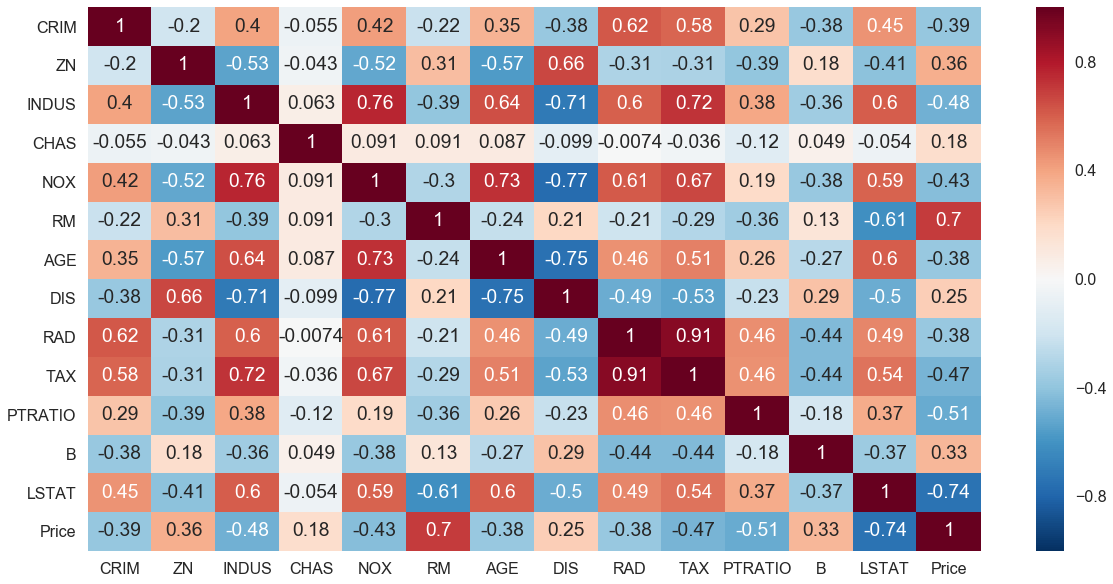

In [46]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_boston.corr(), annot=True)

## Let's define X_bos and y_bos

In [47]:
#Let's define X_bos and y_bos
X_bos=df_boston.iloc[:,0:-1]
y_bos=df_boston.Price

## Let's split the dataset into train and test sets

In [48]:
#Let's split the dataset into train and test set
X_train, X_test, y_train, y_test=train_test_split(X_bos, y_bos, test_size=0.4, random_state=101)

## 5. Linear Regression Model Creation for Boston Housing Dataset

In [49]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
print(lm.intercept_)

41.2814965447


In [51]:
coef=pd.DataFrame(lm.coef_, X_bos.columns, columns=['Coeff'])
coef

,Coeff
CRIM,-0.077558
ZN,0.042031
INDUS,0.091153
CHAS,4.133049
NOX,-19.976557
RM,2.890190
AGE,0.016153
DIS,-1.264747
RAD,0.260171
TAX,-0.011125


## 6. How good is the model? Let's use R squared which measures how well the data fits the model created.

In [52]:
# R squared of training set
lm.score(X_train, y_train)

0.75015014743155262

In [53]:
# R squared of training set
lm.score(X_test, y_test)

0.69964495077419153

In [54]:
## Prediction using the created model for Boston Housing Dataset

In [55]:
y_bos_predict=lm.predict(X_test)

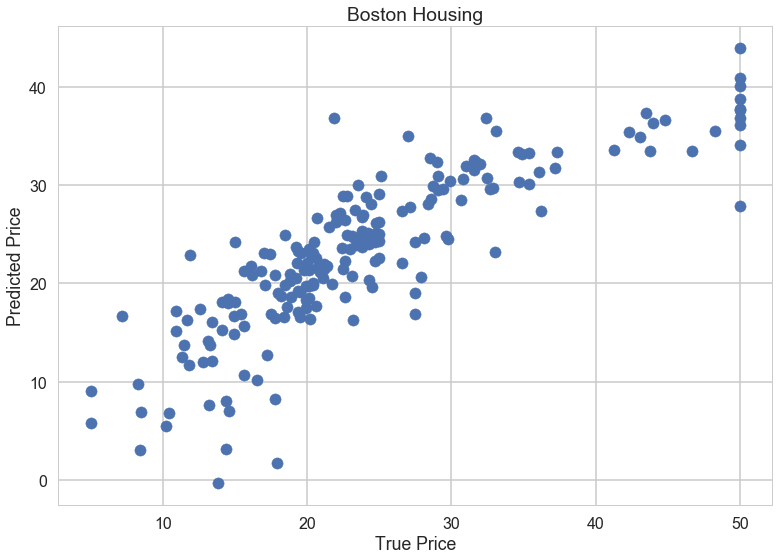

In [56]:
plt.scatter(y_test, y_bos_predict)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('Boston Housing')

C:\Users\pamel\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


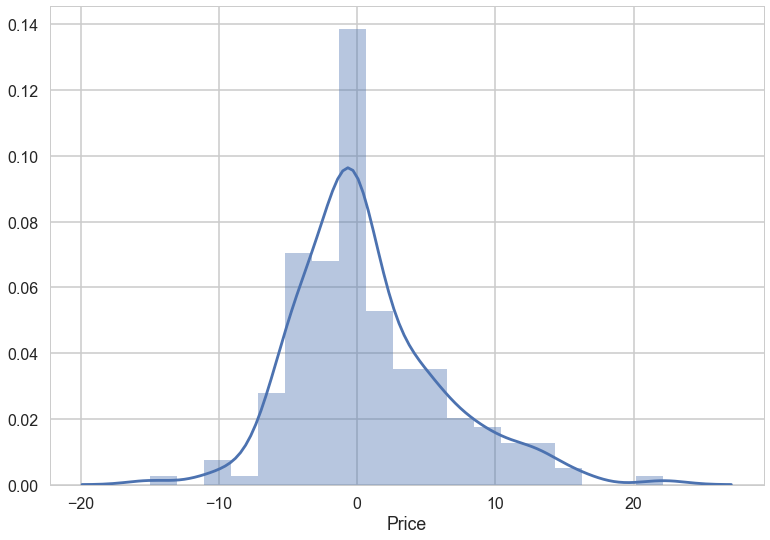

In [57]:
sns.distplot((y_test- y_bos_predict))

In [58]:
#Mean Absolute Error using y_test (MAE)
metrics.mean_absolute_error(y_test, y_bos_predict)

3.9013241932147151

In [59]:
#Mean Squared Error using y_test (MSE)
metrics.mean_squared_error(y_test, y_bos_predict)

29.412643812352574

In [60]:
## Root mean squared error (RMSE)
np.sqrt(metrics.mean_squared_error(y_test, y_bos_predict))

5.4233424944726272